In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLV', 'XLY', 'XLU', 'XLRE', 'XLC']
prices = yf.download(tickers, start = '2015-07-22', end = '2020-07-22')['Close']

prices.dropna(inplace=True)

prices.head()

/var/folders/qd/xclxh05s0x9509nblm6z434w0000gp/T/ipykernel_35253/1324066932.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers, start = '2015-07-22', end = '2020-07-22')['Close']
[*********************100%***********************]  11 of 11 completed


Ticker,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2018-06-19,50.676594,46.785187,54.391655,23.865807,64.921265,66.629044,42.327560,24.852901,40.213207,75.310692,104.431404
2018-06-20,50.511971,47.365799,54.631817,23.804720,64.965576,66.768929,42.368996,25.121161,40.245251,75.470444,104.926552
2018-06-21,49.974800,47.075485,53.620251,23.734917,64.149979,66.255905,42.451900,25.271063,40.381466,75.035583,104.179176
2018-06-22,50.702591,47.281517,54.690025,23.621473,64.371605,66.041374,42.800072,25.491976,40.661888,75.372810,104.001656
2018-06-25,49.914146,46.307598,53.591141,23.368416,63.555984,64.670181,43.015602,25.428856,41.334927,74.680588,101.740746


In [15]:
normalized_prices = prices / prices.iloc[0] 

etfs = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLV', 'XLY', 'XLU', 'XLRE', 'XLC']


pair_list = []
for i in range(len(etfs)):
    for j in range(i + 1, len(etfs)):  # avoid duplicates and self-pairs
        pair_list.append((etfs[i], etfs[j]))

pair_distances = []
for etf1, etf2 in pair_list:
    distance = np.sqrt(np.sum((normalized_prices[etf1] - normalized_prices[etf2]) ** 2))
    pair_distances.append({'Pair': f'{etf1}-{etf2}', 'Distance': distance})

distance_df = pd.DataFrame(pair_distances).sort_values(by='Distance')

distance_df = distance_df[:11]

distance_df


,Pair,Distance
19,XLF-XLI,0.986184
43,XLP-XLRE,1.172874
52,XLU-XLRE,1.182991
9,XLB-XLC,1.280891
1,XLB-XLF,1.312363
51,XLY-XLC,1.368962
42,XLP-XLU,1.396595
40,XLP-XLV,1.553964
2,XLB-XLI,1.561741
30,XLI-XLY,1.680213


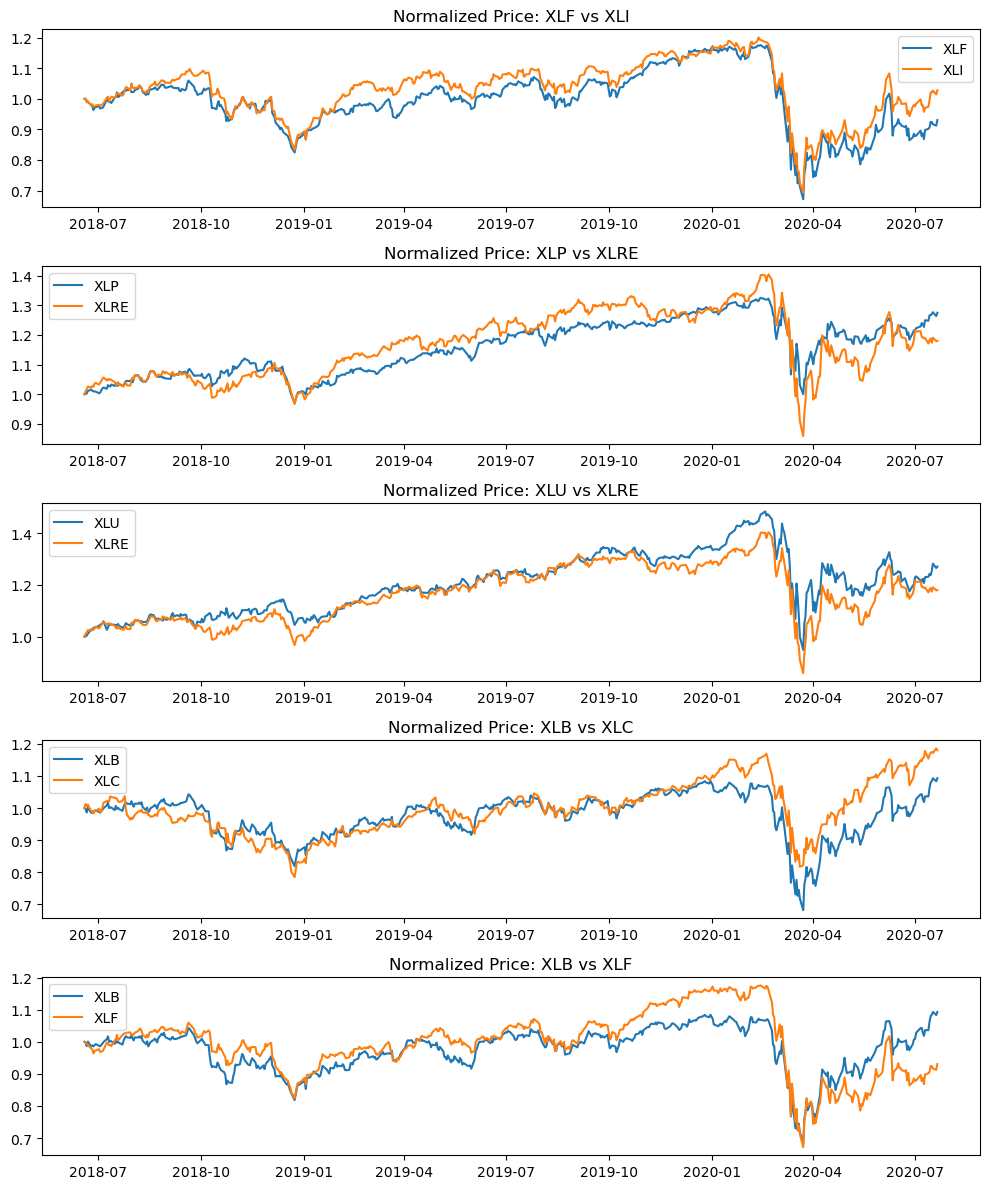

In [16]:
top_5_pairs = distance_df.head(5)['Pair'].tolist()
fig, axs = plt.subplots(len(top_5_pairs), 1, figsize=(10, 12))
for i, pair in enumerate(top_5_pairs):
    etf1, etf2 = pair.split('-')
    axs[i].plot(normalized_prices[etf1], label=etf1)
    axs[i].plot(normalized_prices[etf2], label=etf2)
    axs[i].set_title(f'Normalized Price: {etf1} vs {etf2}')
    axs[i].legend()
plt.tight_layout()
plt.show()